<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Text-Based-AI/blob/master/1_getting_started_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% cd "/content/drive/My Drive/Colab_Notebooks/data_tools/nltk"

/content/drive/My Drive/Colab_Notebooks/data_tools/nltk


1. [**NLTK-Book**](http://www.nltk.org/book/)
2. [more-on-Viterbi-algorithm](http://people.cs.georgetown.edu/nschneid/cosc572/f16/12_viterbi_slides.pdf)
3. [pos-tagging-using-HMM](http://www.phontron.com/slides/nlp-programming-en-04-hmm.pdf)
4. [pos-with-deep-learning](https://becominghuman.ai/part-of-speech-tagging-tutorial-with-the-keras-deep-learning-library-d7f93fa05537)

**It is easy to get our hands on millions of words of text. What can we do with it, assuming we can write some simple programs? Here, we'll address the following questions:**

1. What can we achieve by combining simple programming techniques with large quantities of text?
2. How can we automatically extract key words and phrases that sum up the style and content of a text?
3. What tools and techniques does the Python programming language provide for such work?
4. What are some of the interesting challenges of natural language processing?

<h2>1. Downloads and Imports</h2>

In [45]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter, defaultdict
import string
from nltk.corpus import stopwords

print(f'nltk version: {nltk.__version__}')

nltk version: 3.2.5


In [3]:
nltk.download()
from nltk.book import *

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> books
    Error loading books: Package 'books' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> book
Command 'book' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book
       | 
       | Downloading package abc to /root/n

<h2>2. Searching Text:</h2>

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick.



In [4]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


What other words appear in a similar range of contexts as monstrous? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [5]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [6]:
text2.concordance('monstrous')

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [7]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very

In [8]:
text2.common_contexts(['monstrous','very'])

a_pretty am_glad a_lucky is_pretty be_glad


In [9]:
text1.common_contexts(['monstrous', 'perilous'])

most_and


we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text

Lexical Dispersion Plot for Words in U.S. Presidential Inaugural Addresses: This can be used to investigate changes in language use over time

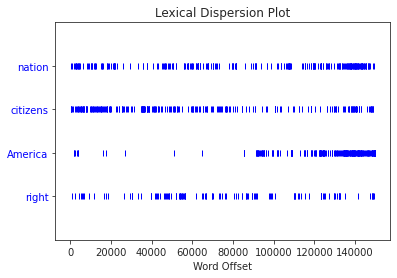

In [10]:
sns.set_style('ticks')
text4.dispersion_plot(['nation', 'citizens', 'America', 'right'])

<h2>3. Counting Vocabulary:</h2>

In this section we will see how to use the computer to count the words in a text in a variety of useful ways

In [11]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or **`"tokens."`** A token is the technical name for a sequence of characters — such as hairy, his, or...<br>How many distinct words does the book of Genesis contain?  The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. We can find this with `set(text3)`

In [13]:
# confirming what type of documents we're dealing with
type(text1)

nltk.text.Text

In [14]:
def get_unique_tokens(text):
    """Find the unique tokens in a text

    @param text: an nltk.text.Text object
    @return: two items, first is the count,
            second is a list of unique items
    """
    unique_list = list(sorted(set(text)))
    return len(unique_list), unique_list

In [15]:
unique_text3 = get_unique_tokens(text3)
print(f'Genesis contains {unique_text3[0]} unique tokens\n')
unique_text3[1][:20]

Genesis contains 2789 unique tokens



['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

Although it has 44,764 tokens, this book has only 2,789 distinct words, vocabulary, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

**lexical richness of the text:**<br>
The lexical richness of the text computes the ratio of unique words to the number of distinct words in the text.
Let's write a function to print the lexical richness for all texts here

In [16]:
# First get the titles
titles = ['text1: Moby Dick by Herman Melville 1851', \
          'text2: Sense and Sensibility by Jane Austen 1811', \
          'text3: The Book of Genesis', \
          'text4: Inaugural Address Corpus', \
          'text5: Chat Corpus', \
          'text6: Monty Python and the Holy Grail', \
          'text7: Wall Street Journal', \
          'text8: Personals Corpus', \
          'text9: The Man Who Was Thursday by G . K . Chesterton 1908']
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [17]:
def lexical_richness(texts=texts, titles=titles):
    dictt = {}
    for text, title in zip(texts, titles):
        key = title[:5]
        unique_tokens = get_unique_tokens(text)[0]
        total_tokens = len(text)
        richness = round((unique_tokens / total_tokens)*100, 2)
        dictt[key] = richness

    return dictt

In [18]:
lex_richness = lexical_richness()
print(lex_richness)

{'text1': 7.41, 'text2': 4.83, 'text3': 6.23, 'text4': 6.62, 'text5': 13.48, 'text6': 12.77, 'text7': 12.32, 'text8': 22.77, 'text9': 9.83}


Now to identify the text that has the highest lexical richness, simply use the max().

In [19]:
max(lex_richness, key=lex_richness.get)

'text8'

<h2>1. A Closer Look at Python: Texts as Lists of Words</h2>
<h2>2. Python Variables and Strings,  

In [25]:
text4[5]

'Senate'

In [26]:
text4.index('Senate')

5

Notice that our indexes start from zero: sent element zero, written sent[0]. The reason is simple: the moment Python accesses the content of a list from the computer's memory, it is already at the first element; we have to tell it how many elements forward to go. Thus, zero steps forward leaves it at the first element.

We can also replace an entire slice with new material

In [29]:
list_x = ['one', 'two', 'three', 'four', 'five', 'six']

# Now slice off a chunk of the list and assign smtn
list_x[2:] = ['ten']  # putting in a list keeps the element together

#show list
list_x

['one', 'two', 'ten']

<h2>3. Computing with Language: Simple Statistics</h2>

Now, we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text

In [32]:
saying = ['After', 'all', 'is', 'said', 'and', 'done','more', 'is', 'said', 'than', 'done']
# let' tokenize it
tokens = get_unique_tokens(saying)[1]
tokens[-2:]

['said', 'than']

<h3>3.1. Frequency Distributions</h3>

How can we automatically identify the words of a text that are most informative about the topic and genre of the text?

**Using The Counter Object**

In [61]:
# first remove punctuation and stop-words
text3_list3 = [i for i in text1 if i not in string.punctuation and i not in stopwords.words('english')]

In [62]:
# Then use a counter object to count unique words
text_dict3 = Counter(text3_list3)

In [63]:
# Count howmany unique words exist in text3 without punctuations and stop words.
len(text_dict3)

19154

In [64]:
# find word with maximum frequency
max(text_dict3, key=text_dict3.get)

'I'

In [68]:
text_dict3['I']

2124

**Using NLTK freqdist**

Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of `Moby Dick`:<br>
Note: it's called frequency distribution cos it tells us the frequency of each vocabulary item in the text.

In [65]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [69]:
# Let's print the 50 most common words of text1
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

Only one word, whale, is slightly informative! It occurs over 906 times. The rest of the words tell us nothing about the text; they're just English `"plumbing."` What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words

When we first invoke FreqDist, we pass the name of the text as an argument. We can inspect the total number of words (**"outcomes"**) that have been counted up— 260,819 in the case of Moby Dick.

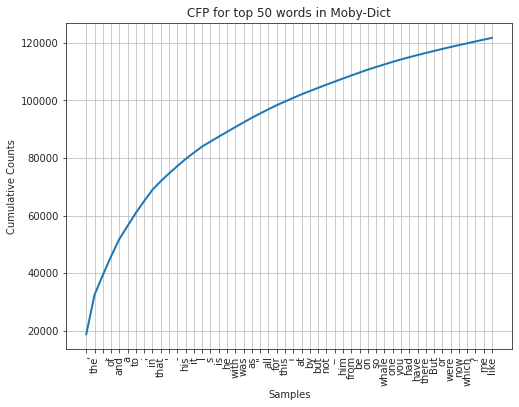

In [76]:
plt.figure(figsize=(8,6))
plt.title('CFP for top 50 words in Moby-Dict')
fdist1.plot(50, cumulative=True)

Wow! These 50 words account for nearly half the book!

If the frequent words don't help us, how about the words that occur once only, the so-called **`hapaxes`**?

In [77]:
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

We can see that fdist1 contains some stop-words as we did not exactly clean text1. let's try it on the cleaned text3

In [67]:
fdist3 = FreqDist(text3_list3)
fdist3.most_common(10)

[('I', 2124),
 ('--', 1070),
 ('whale', 906),
 ('one', 889),
 ('But', 705),
 ('like', 624),
 ('The', 612),
 ('upon', 538),
 ('man', 508),
 ('ship', 507)]

**3.2 Fine-grained Selection of Words:**